# Assignment 6 Questions - 2D Arrays | DSA
## Name: Asit Piri

# Question 1

💡 A permutation perm of n + 1 integers of all the integers in the range [0, n] can be represented as a string s of length n where:

- s[i] == 'I' if perm[i] < perm[i + 1], and
- s[i] == 'D' if perm[i] > perm[i + 1].

Given a string s, reconstruct the permutation perm and return it. If there are multiple valid permutations perm, return **any of them**.

**Example 1:**

**Input:** s = "IDID"

**Output:**

[0,4,1,3,2]

## Solution

To reconstruct the permutation perm from the given string s, we can iterate over s and build the permutation incrementally. Here's the algorithm:

1. Initialize an empty array perm to store the reconstructed permutation.

2. Initialize a variable n with the length of s.

3. Initialize two variables low and high with 0 and n respectively. These variables represent the lower and upper bounds for the remaining unused numbers in the permutation.

4. Iterate over each character ch in s:
    
    - If ch is 'I': Append low to perm and increment low by 1.

    - If ch is 'D': Append high to perm and decrement high by 1.

5. Append either low or high to perm. Both low and high will have the same value at this point, so it doesn't matter which one is appended.

6. Return the reconstructed permutation perm.

Here's the Python code that implements this algorithm:

In [1]:
def findPermutation(s):
    n = len(s)
    perm = []
    low, high = 0, n

    for ch in s:
        if ch == 'I':
            perm.append(low)
            low += 1
        elif ch == 'D':
            perm.append(high)
            high -= 1

    perm.append(low)  # Append either low or high

    return perm

### Test Cases

In [2]:
# Test Case 1

s = "IDID"
perm = findPermutation(s)
print(perm)

[0, 4, 1, 3, 2]


# Question 2

💡 You are given an m x n integer matrix matrix with the following two properties:

- Each row is sorted in non-decreasing order.
- The first integer of each row is greater than the last integer of the previous row.

Given an integer target, return true *if* target *is in* matrix *or* false *otherwise*.

You must write a solution in O(log(m * n)) time complexity.

**Example 1:**

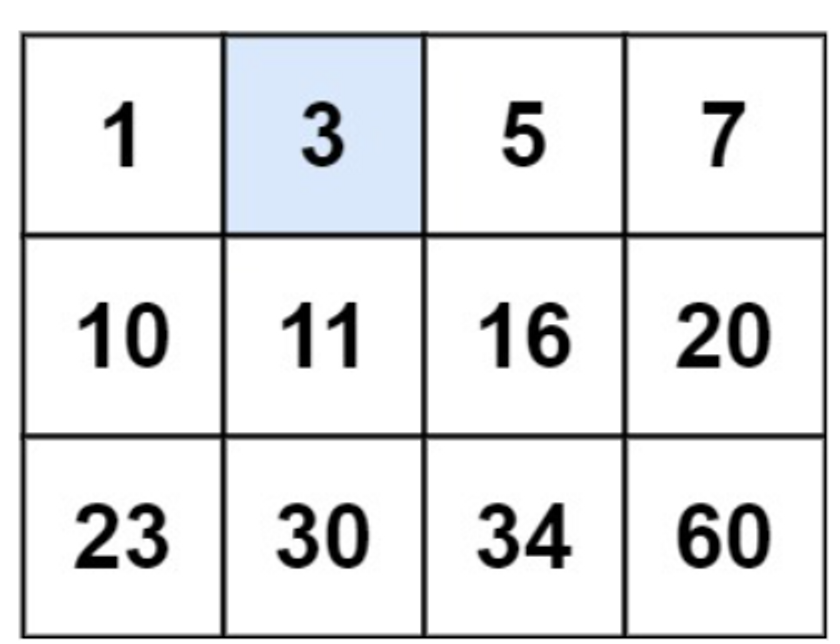

**Input:** matrix = [[1,3,5,7],[10,11,16,20],[23,30,34,60]], target = 3

**Output:** true

## Solution

To solve this problem efficiently in O(log(m * n)) time complexity, we can treat the 2D matrix as a sorted 1D array and perform a binary search on it. Here's the algorithm:

Initialize two variables, left and right, to represent the start and end indices of the search range. Set left to 0 and right to m * n - 1.
While left is less than or equal to right, do:
Compute the middle index as mid = (left + right) // 2.
Convert the middle index into row and column indices:
row = mid // n
col = mid % n
Compare the element at the middle index, matrix[row][col], with the target:
If matrix[row][col] is equal to the target, return True.
If matrix[row][col] is less than the target, update left = mid + 1 to search in the right half of the matrix.
If matrix[row][col] is greater than the target, update right = mid - 1 to search in the left half of the matrix.
If the target is not found after the binary search loop, return False.
Here's the Python code that implements this algorithm:

In [3]:
def searchMatrix(matrix, target):
    m, n = len(matrix), len(matrix[0])
    left, right = 0, m * n - 1

    while left <= right:
        mid = (left + right) // 2
        row = mid // n
        col = mid % n

        if matrix[row][col] == target:
            return True
        elif matrix[row][col] < target:
            left = mid + 1
        else:
            right = mid - 1

    return False

### Test Cases

In [4]:
# Test Case 1

matrix = [[1, 3, 5, 7], [10, 11, 16, 20], [23, 30, 34, 60]]
target = 3
found = searchMatrix(matrix, target)
print(found)

True


# Question 3

💡 Given an array of integers arr, return *true if and only if it is a valid mountain array*.

Recall that arr is a mountain array if and only if:

- arr.length >= 3
- There exists some i with 0 < i < arr.length - 1 such that:
    - arr[0] < arr[1] < ... < arr[i - 1] < arr[i]
    - arr[i] > arr[i + 1] > ... > arr[arr.length - 1]

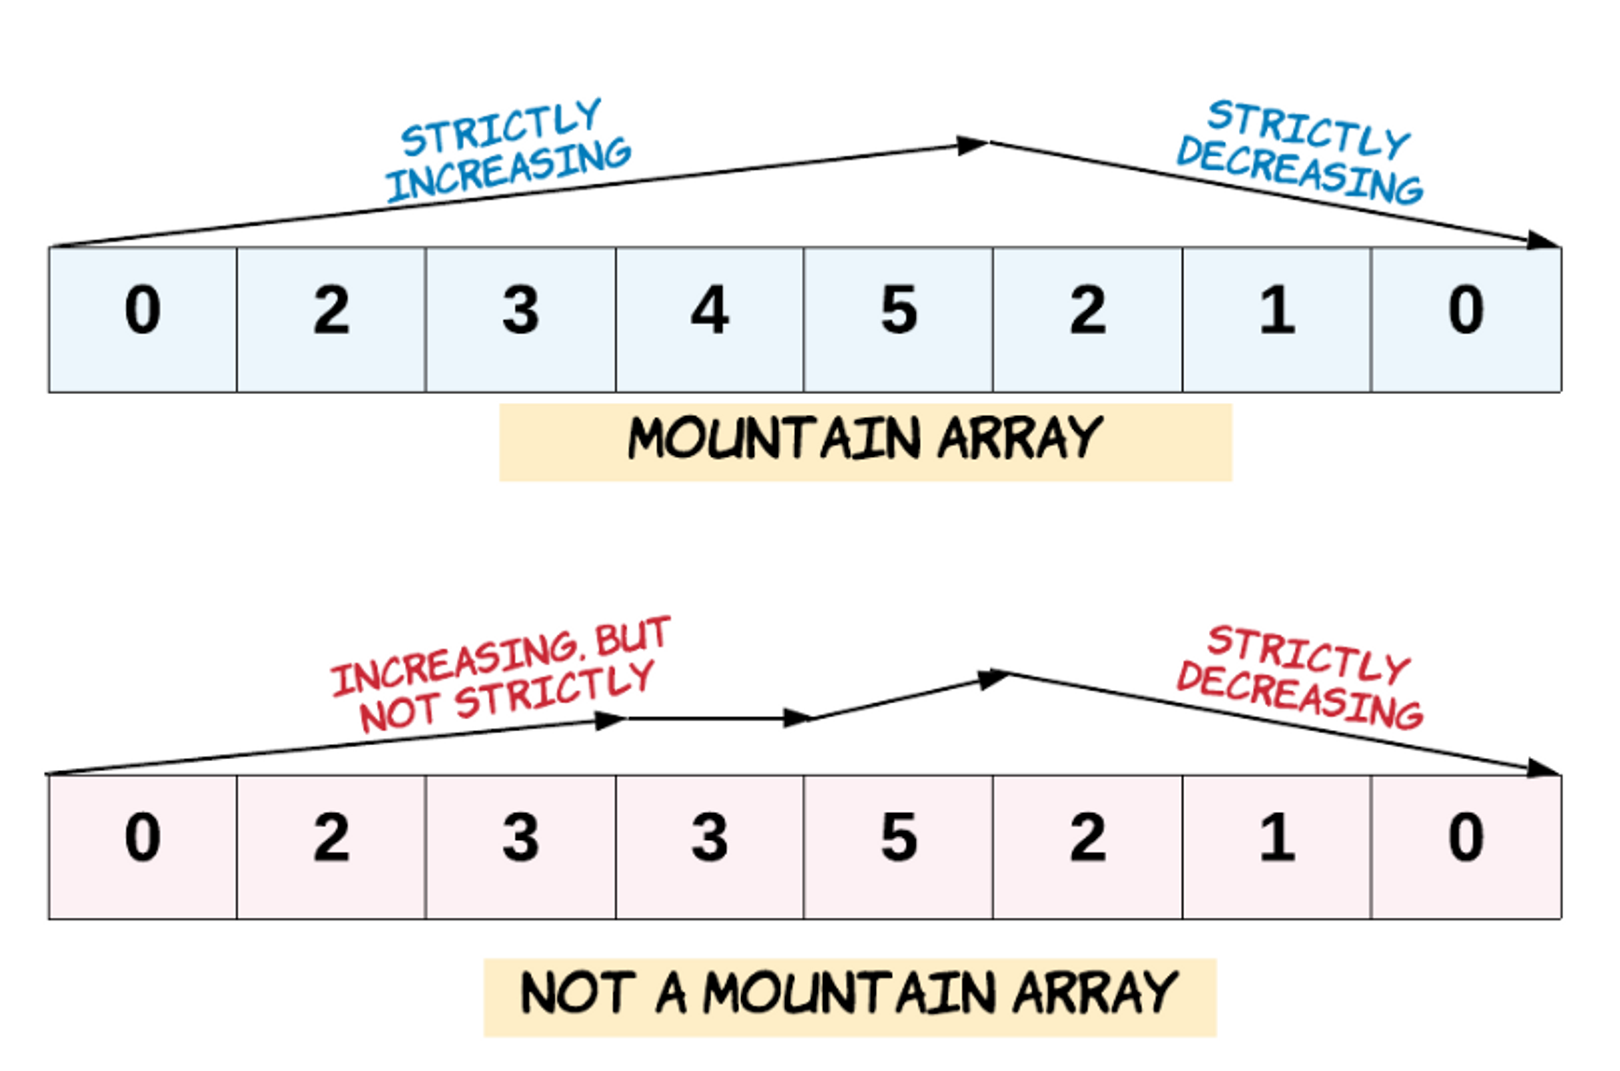

**Example 1:**

**Input:** arr = [2,1]

**Output:**

false



### Solution

To determine if an array is a valid mountain array, we need to check if it satisfies the given conditions:

1. The length of the array should be at least 3.

2. There exists an index i such that 0 < i < arr.length - 1, and the elements before i are strictly increasing while the elements after i are strictly decreasing.

Here's the Python code to solve this problem:

In [7]:
def validMountainArray(arr):
    n = len(arr)
    if n < 3:
        return False

    i = 0
    while i < n - 1 and arr[i] < arr[i + 1]:
        i += 1

    if i == 0 or i == n - 1:
        return False

    while i < n - 1 and arr[i] > arr[i + 1]:
        i += 1

    return i == n - 1

### Test Cases

In [8]:
# Test Case 1

arr = [2, 1]
is_valid = validMountainArray(arr)
print(is_valid)

False


### Conclusion

The **time complexity of this code is O(n)**, where n is the length of the input array. We iterate through the array at most twice, once to find the peak element and once to verify the decreasing part. Both iterations take linear time.

The **space complexity is O(1)** because we only use a constant amount of additional space to store the index i and a few variables.

# Question 4

💡 Given a binary array nums, return *the maximum length of a contiguous subarray with an equal number of* 0 *and* 1.

**Example 1:**

**Input:** nums = [0,1]

**Output:** 2

**Explanation:**

[0, 1] is the longest contiguous subarray with an equal number of 0 and 1.

## Solution

To find the maximum length of a contiguous subarray with an equal number of 0 and 1, we can use the concept of a running sum. We'll iterate through the binary array, keeping track of the count of 0s and 1s encountered so far. If at any point the count of 0s is equal to the count of 1s, we update the maximum length of the subarray.

Here's the Python code to solve this problem:

In [9]:
def findMaxLength(nums):
    count = 0  # Initialize the count of 0s and 1s
    max_length = 0  # Initialize the maximum length of subarray

    # Create a dictionary to store the count of 0s and 1s encountered
    count_dict = {0: -1}

    for i in range(len(nums)):
        if nums[i] == 0:
            count -= 1
        else:
            count += 1

        if count in count_dict:
            # If the count already exists in the dictionary, update the max_length
            max_length = max(max_length, i - count_dict[count])
        else:
            # If the count is encountered for the first time, add it to the dictionary
            count_dict[count] = i

    return max_length

### Test Cases

In [10]:
# Test Case 1

nums = [0, 1]
max_len = findMaxLength(nums)
print(max_len)

2


### Conclusion

The **time complexity of this code is O(n)**, where n is the length of the input array. We iterate through the array once, and for each element, we perform constant-time operations.

The **space complexity is O(n)** as well. In the worst case, all the elements of the array can have distinct counts, and thus, the count_dict can store up to n key-value pairs.

# Question 5

💡 The **product sum** of two equal-length arrays a and b is equal to the sum of a[i] * b[i] for all 0 <= i < a.length (**0-indexed**).

- For example, if a = [1,2,3,4] and b = [5,2,3,1], the **product sum** would be 1*5 + 2*2 + 3*3 + 4*1 = 22.

Given two arrays nums1 and nums2 of length n, return *the **minimum product sum** if you are allowed to **rearrange** the **order** of the elements in* nums1.

**Example 1:**

**Input:** nums1 = [5,3,4,2], nums2 = [4,2,2,5]

**Output:** 40

**Explanation:**

We can rearrange nums1 to become [3,5,4,2]. The product sum of [3,5,4,2] and [4,2,2,5] is 3*4 + 5*2 + 4*2 + 2*5 = 40.


## Solution

To find the minimum product sum by rearranging the elements in nums1, we can follow these steps:

1. Sort nums1 in ascending order.

2. Sort nums2 in descending order.

3. Calculate the product sum by multiplying the corresponding elements from nums1 and nums2 and summing them up.

Here's the Python code to solve this problem:

In [13]:
def minProductSum(nums1, nums2):
    nums1.sort()  # Sort nums1 in ascending order
    nums2.sort(reverse=True)  # Sort nums2 in descending order

    min_product_sum = sum(nums1[i] * nums2[i] for i in range(len(nums1)))

    return min_product_sum

### Test Cases

In [14]:
# Test Case 1

nums1 = [5, 3, 4, 2]
nums2 = [4, 2, 2, 5]
min_sum = minProductSum(nums1, nums2)
print(min_sum)

40


### Conclusion

The **time complexity of this code is O(n log n)**, where n is the length of the input arrays. The sorting operations on nums1 and nums2 contribute to the time complexity.

The **space complexity is O(1)** since we are not using any additional data structures that grow with the input size.

# Question 6

💡 An integer array original is transformed into a **doubled** array changed by appending **twice the value** of every element in original, and then randomly **shuffling** the resulting array.

Given an array changed, return original *if* changed *is a **doubled** array. If* changed *is not a **doubled** array, return an empty array. The elements in* original *may be returned in **any** order*.

**Example 1:**

**Input:** changed = [1,3,4,2,6,8]

**Output:** [1,3,4]

**Explanation:** One possible original array could be [1,3,4]:

- Twice the value of 1 is 1 * 2 = 2.
- Twice the value of 3 is 3 * 2 = 6.
- Twice the value of 4 is 4 * 2 = 8.

Other original arrays could be [4,3,1] or [3,1,4].

## Solution

To solve this problem, we can iterate over the changed array and check if each element can be divided by 2. We can then divide the element by 2 and check if the resulting value exists in a set. If it does, we remove the value from the set; otherwise, we return an empty array. At the end, we return the remaining elements in the set, which represent the original array.

Here's the Python code to implement this:

In [16]:
def findOriginalArray(changed):
    if len(changed) % 2 != 0:
        return []  # If the length is odd, it's not a valid doubled array

    original = []
    num_count = {}

    for num in changed:
        if num % 2 == 0 and num // 2 in num_count and num_count[num // 2] > 0:
            original.append(num // 2)
            num_count[num // 2] -= 1
        else:
            num_count[num] = num_count.get(num, 0) + 1

    if len(original) != len(changed) // 2:
        return []  # If not all elements were used, it's not a valid doubled array

    return original

### Test Cases

In [17]:
# Test Case 1

changed = [1, 3, 4, 2, 6, 8]
original = findOriginalArray(changed)
print(original)

[1, 3, 4]


In [18]:
# Test Case 2

changed = [2, 3, 5, 4, 6, 10]
original = findOriginalArray(changed)
print(original)

[2, 3, 5]


### conclusion

In this code, we use a dictionary (num_count) to keep track of the count of each number in the changed array. We iterate over the array, check if each number is divisible by 2, and if the resulting value exists in the dictionary. If so, we add the divided value to the original array and decrement its count in the dictionary. If all elements are processed correctly and the resulting original array has the expected length, we return it. Otherwise, we return an empty array.

The **time complexity of this code is O(n)**, where n is the length of the changed array. We iterate over the array once to process each element.

The **space complexity is O(n)**, where n is the length of the changed array. In the worst case, all elements could be unique, so the dictionary (num_count) could store n/2 elements.

# Question 7

💡 Given a positive integer n, generate an n x n matrix filled with elements from 1 to n2 in spiral order.

**Example 1:**

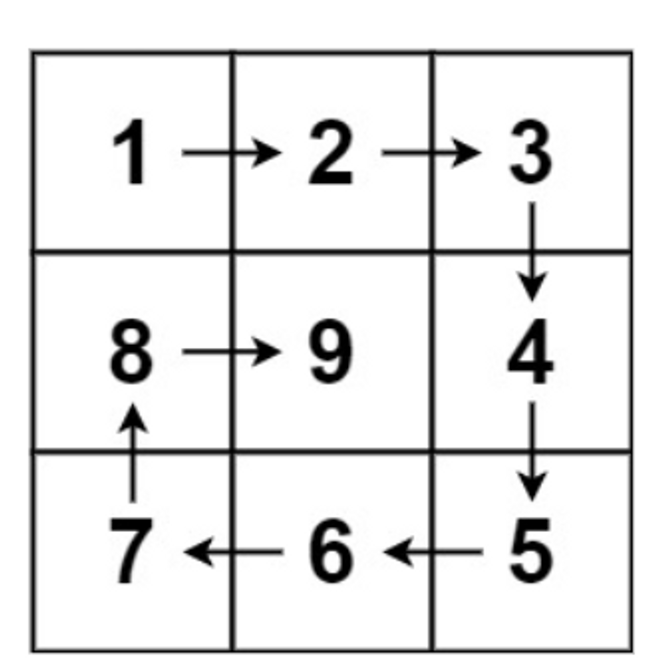

**Input:** n = 3

**Output:** [[1,2,3],[8,9,4],[7,6,5]]

## Solution

To generate a matrix filled with elements from 1 to n^2 in spiral order, we can initialize an empty matrix of size n x n. Then, we can iterate in a spiral pattern, filling the matrix with the desired values.

Here's the Python code to implement this:

In [19]:
def generateMatrix(n):
    matrix = [[0] * n for _ in range(n)]
    num = 1
    top, bottom, left, right = 0, n-1, 0, n-1

    while top <= bottom and left <= right:
        # Traverse top row
        for j in range(left, right+1):
            matrix[top][j] = num
            num += 1
        top += 1

        # Traverse right column
        for i in range(top, bottom+1):
            matrix[i][right] = num
            num += 1
        right -= 1

        if top <= bottom:
            # Traverse bottom row
            for j in range(right, left-1, -1):
                matrix[bottom][j] = num
                num += 1
            bottom -= 1

        if left <= right:
            # Traverse left column
            for i in range(bottom, top-1, -1):
                matrix[i][left] = num
                num += 1
            left += 1

    return matrix

### Test Cases

In [20]:
# Test Case 1
n = 3
matrix = generateMatrix(n)
for row in matrix:
    print(row)

[1, 2, 3]
[8, 9, 4]
[7, 6, 5]


### Conclusion

In this code, we first initialize an empty matrix filled with zeros. Then, we use four pointers (top, bottom, left, right) to keep track of the boundaries of the current spiral layer. We start with the outermost layer and iterate in a clockwise spiral pattern, filling the matrix with the values num in increasing order. After each layer is traversed, we update the pointers to move to the next inner layer.

The **time complexity of this code is O(n^2)**, where n is the given positive integer. We need to fill all n x n elements in the matrix.

The **space complexity is O(n^2)** as well because we create an n x n matrix to store the elements.

# Question 8

💡 Given two [sparse matrices](https://en.wikipedia.org/wiki/Sparse_matrix) mat1 of size m x k and mat2 of size k x n, return the result of mat1 x mat2. You may assume that multiplication is always possible.

**Example 1:**

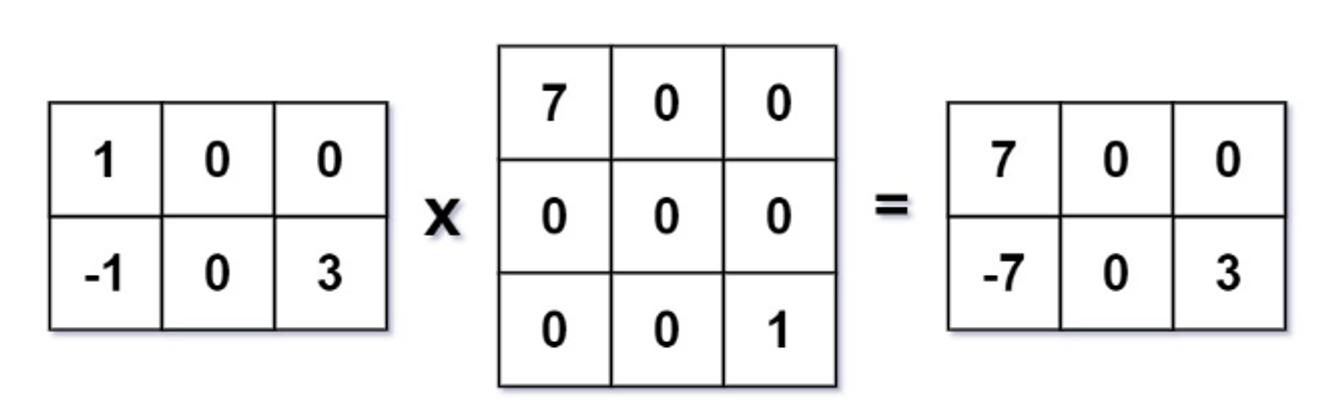

**Input:** mat1 = [[1,0,0],[-1,0,3]], mat2 = [[7,0,0],[0,0,0],[0,0,1]]

**Output:**

[[7,0,0],[-7,0,3]]

## Solution

To multiply two sparse matrices mat1 and mat2, we can use the conventional matrix multiplication algorithm. However, since the matrices are sparse (meaning they contain a significant number of zeros), we can optimize the multiplication process by avoiding unnecessary calculations.

Here's the Python code to multiply two sparse matrices:

In [21]:
def multiply(mat1, mat2):
    m, k, n = len(mat1), len(mat1[0]), len(mat2[0])
    result = [[0] * n for _ in range(m)]

    for i in range(m):
        for j in range(n):
            for p in range(k):
                result[i][j] += mat1[i][p] * mat2[p][j]

    return result

### Test Cases

In [22]:
# Test Case 1

mat1 = [[1, 0, 0], [-1, 0, 3]]
mat2 = [[7, 0, 0], [0, 0, 0], [0, 0, 1]]
result = multiply(mat1, mat2)
for row in result:
    print(row)

[7, 0, 0]
[-7, 0, 3]


### Conclusion

In this code, we first determine the dimensions of the matrices: m x k for mat1 and k x n for mat2. Then, we create an empty result matrix of size m x n to store the multiplication result.

Next, we iterate over each element of the result matrix (indexed by i and j) and calculate the dot product of the corresponding row of mat1 and column of mat2. We use a nested loop to iterate over the shared dimension (k) and accumulate the sum of products in the result matrix.

The time complexity of this code is O(m * k * n), where m, k, and n are the dimensions of the matrices. We iterate over each element of the result matrix and perform k multiplications for each element.

The space complexity is O(m * n) because we create a new matrix to store the result.